<a href="https://colab.research.google.com/github/AdityaRaj1331/X-tra-Telegram/blob/master/Project_Startup_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup Investment Analysis



# PROJECT TITLE:
 Startup Investment

# PROBLEM STATEMENT:
 Explanation of Startup Investment.
 Putting down capital in exchange with their investment.



# Dataset information:
1. The investments series at a company level are given.
2. The company status are given - the interesting challenge would be discover if the investments and other criteria help company to be an operating / closed / acquired stage.
3. A classification problem.
4. Records – 54294
5. Features – 39

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Plot graph
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Packages for Models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

import warnings
warnings.filterwarnings("ignore")


# Data Retrieval

# Read File

In [ ]:
data = pd.read_csv('/content/investments_VC.csv', on_bad_lines='skip',encoding = "ISO-8859-1")

In [ ]:
data.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,...,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,...,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Data Cleaning

In [ ]:
len(data)

29414

In [ ]:
data.tail()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
29409,/organization/nomad-goods,NOMAD GOODS,http://www.hellonomad.com,|Mobile|Hardware|Fashion|Hardware + Software|,Fashion,"3,34,171",operating,USA,CA,SF Bay Area,...,0.0,334171.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29410,/organization/nomad-mobile-guides,Nomad Mobile Guides,http://www.nomadmobileguides.com,|Travel|,Travel,"2,55,000",operating,USA,VA,Roanoke,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29411,/organization/nomadesk,Nomadesk,http://www.nomadesk.com,|Enterprise 2.0|Business Services|Enterprise S...,Enterprise 2.0,"1,12,98,100",operating,USA,TX,Austin,...,0.0,0.0,3998100.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
29412,/organization/nomadica-brainstorming,Nomadica Brainstorming,http://www.nomadicabrainstorming.como,|Web Tools|Incubators|Software|,Software,"6,00,000",closed,ESP,NaN,Barcelona,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29413,/organization/nomanini,Nomanini,http://nomanini.com,|Curated Web|,Curated Web,"10,50,000",operating,ZAF,NaN,Cape Town,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you can see in two outputs above,
we have 58,455 rows of data but some of them not contain any information.
It may lead to misdirection summary when we do some analysis or visualize them.

Then, I just remove them by select only data which has "name" column

In [ ]:
## select only data which name is not null

data = data[~data.name.isna()]

In [ ]:
da = data[~data.name.isna()]
len(da)

29413

In [ ]:
data.name.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
29409    False
29410    False
29411    False
29412    False
29413    False
Name: name, Length: 29413, dtype: bool

In [ ]:
len(data)

29413

Okay..., we have around 53,598 companies left in our dataset


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29413 entries, 0 to 29413
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             29413 non-null  object 
 1   name                  29413 non-null  object 
 2   homepage_url          27365 non-null  object 
 3   category_list         27027 non-null  object 
 4    market               27022 non-null  object 
 5    funding_total_usd    29413 non-null  object 
 6   status                28632 non-null  object 
 7   country_code          26388 non-null  object 
 8   state_code            18005 non-null  object 
 9   region                26388 non-null  object 
 10  city                  25849 non-null  object 
 11  funding_rounds        29413 non-null  int64  
 12  founded_at            22934 non-null  object 
 13  founded_month         22898 non-null  object 
 14  founded_quarter       22898 non-null  object 
 15  founded_year       

In [ ]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Deal with NaN values and Encode Categorical Features

In [ ]:
data.isna().sum()

permalink                   0
name                        0
homepage_url             2048
category_list            2386
 market                  2391
 funding_total_usd          0
status                    781
country_code             3025
state_code              11408
region                   3025
city                     3564
funding_rounds              0
founded_at               6479
founded_month            6515
founded_quarter          6515
founded_year             6515
first_funding_at            0
last_funding_at             0
seed                        0
venture                     0
equity_crowdfunding         0
undisclosed                 0
convertible_note            0
debt_financing              0
angel                       0
grant                       1
private_equity              1
post_ipo_equity             1
post_ipo_debt               1
secondary_market            1
product_crowdfunding        1
round_A                     1
round_B                     1
round_C   

In [ ]:
print( data.columns.values )

['permalink' 'name' 'homepage_url' 'category_list' ' market '
 ' funding_total_usd ' 'status' 'country_code' 'state_code' 'region'
 'city' 'funding_rounds' 'founded_at' 'founded_month' 'founded_quarter'
 'founded_year' 'first_funding_at' 'last_funding_at' 'seed' 'venture'
 'equity_crowdfunding' 'undisclosed' 'convertible_note' 'debt_financing'
 'angel' 'grant' 'private_equity' 'post_ipo_equity' 'post_ipo_debt'
 'secondary_market' 'product_crowdfunding' 'round_A' 'round_B' 'round_C'
 'round_D' 'round_E' 'round_F' 'round_G' 'round_H']


From those columns above,
I will select "status", "market", "funding total usd", "founded at" , "country code"
to do some roughly describe the dataset

Warning

    some column name contains space in string,
    I decide to remove them first.

In [ ]:
data.rename(columns={' funding_total_usd ': "funding_total_usd",
                    ' market ': "market"},inplace=True)

status

In [ ]:
data['status'].value_counts()

operating    24911
acquired      2202
closed        1519
Name: status, dtype: int64

In [ ]:
data.describe()

,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,29413.000000,22898.000000,2.941300e+04,2.941300e+04,2.941300e+04,2.941300e+04,2.941300e+04,2.941300e+04,2.941300e+04,2.941200e+04,...,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04,2.941200e+04
mean,1.691327,2007.251550,2.124065e+05,7.621076e+06,7.306514e+03,1.339106e+05,2.389695e+04,1.295374e+06,6.431673e+04,1.441559e+05,...,2.602487e+04,5.936001e+03,1.258268e+06,1.481425e+06,1.203328e+06,7.514775e+05,3.677140e+05,1.722205e+05,5.483533e+04,2.392221e+04
std,1.288629,7.455404,1.027884e+06,2.999611e+07,2.410884e+05,3.182964e+06,1.780629e+06,2.998101e+07,6.735275e+05,4.534890e+06,...,1.970983e+06,3.360112e+05,5.723445e+06,7.626791e+06,8.068327e+06,9.316786e+06,5.951087e+06,7.097864e+06,6.204726e+06,3.522372e+06
min,1.000000,1905.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,2005.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000,2009.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000,2012.000000,2.011800e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,16.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.200000e+09,6.359026e+07,4.120000e+08,...,2.100000e+08,5.200000e+07,3.190000e+08,5.420000e+08,3.750000e+08,9.500000e+08,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


In [ ]:
# Describing a non Numerical Data
data.describe(exclude=[np.number])

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,founded_at,founded_month,founded_quarter,first_funding_at,last_funding_at
count,29413,29413,27365,27027,27022,29413,28632,26388,18005,26388,25849,22934,22898,22898,29413,29413
unique,29413,29373,27294,10057,703,9345,3,102,61,949,3212,2635,374,191,3528,3262
top,/organization/waywire,Compass,http://www.cgtrader.com,|Biotechnology|,Software,-,operating,USA,CA,SF Bay Area,San Francisco,2011-01-01,2011-01,2012-Q1,2013-01-01,2013-01-01
freq,1,3,2,2324,2730,5106,24911,17195,5893,3999,1504,1282,1354,1679,276,224


In [ ]:
data.region

0        New York City
1          Los Angeles
2              Tallinn
3               London
4               Dallas
             ...      
29409      SF Bay Area
29410          Roanoke
29411           Austin
29412        Barcelona
29413        Cape Town
Name: region, Length: 29413, dtype: object

In [ ]:
data.city == 'New York'

0         True
1        False
2        False
3        False
4        False
         ...  
29409    False
29410    False
29411    False
29412    False
29413    False
Name: city, Length: 29413, dtype: bool

# Visualization

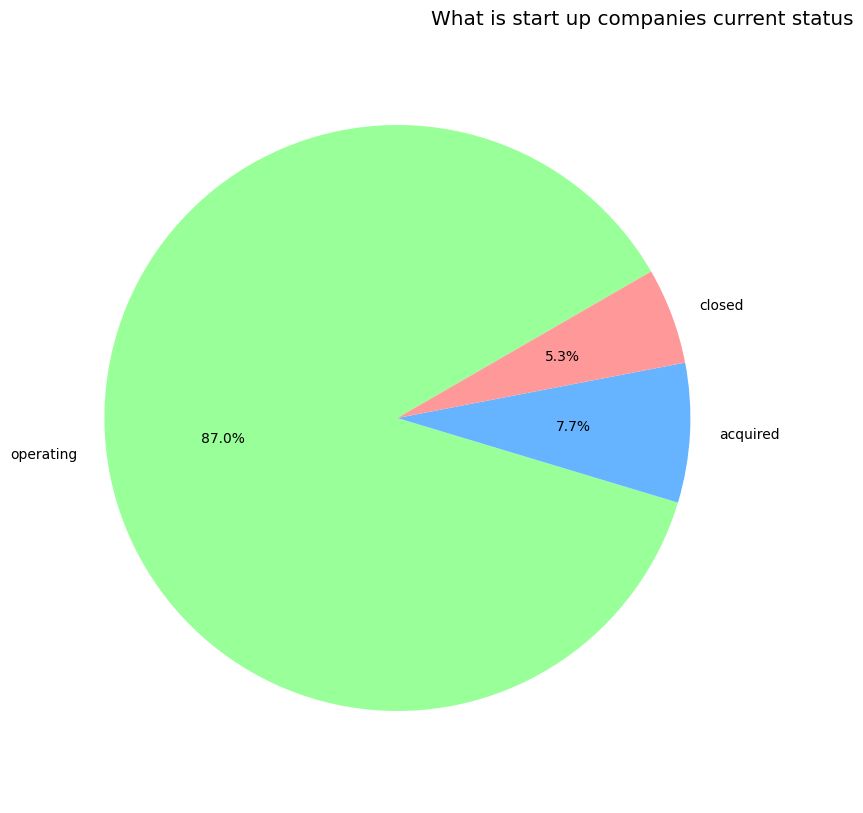

In [ ]:
plt.rcParams['figure.figsize'] = 8,8
labels = data['status'].value_counts().index.tolist()
sizes = data['status'].value_counts().tolist()
explode = (0, 0, 0.2)
colors = ['#99ff99','#66b3ff','#ff9999']

plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("What is start up companies current status", fontdict=None, position= [0.88,2], size = 'x-large')
plt.show()

Most of company (86.9 %) in this dataset is operating,
and around 5.4 % company is already closed.

In [ ]:
len(data['market'].unique())

704

In [ ]:
data['market'].value_counts()[:15]

 Software                2730
 Biotechnology           2388
 Mobile                  1167
 E-Commerce              1063
 Curated Web              931
 Health Care              762
 Enterprise Software      758
 Clean Technology         722
 Games                    687
 Advertising              671
 Hardware + Software      627
 Health and Wellness      568
 Finance                  536
 Education                506
 Social Media             483
Name: market, dtype: int64

because we have around 754 categories of start up,
Then just plot the top 15   : )

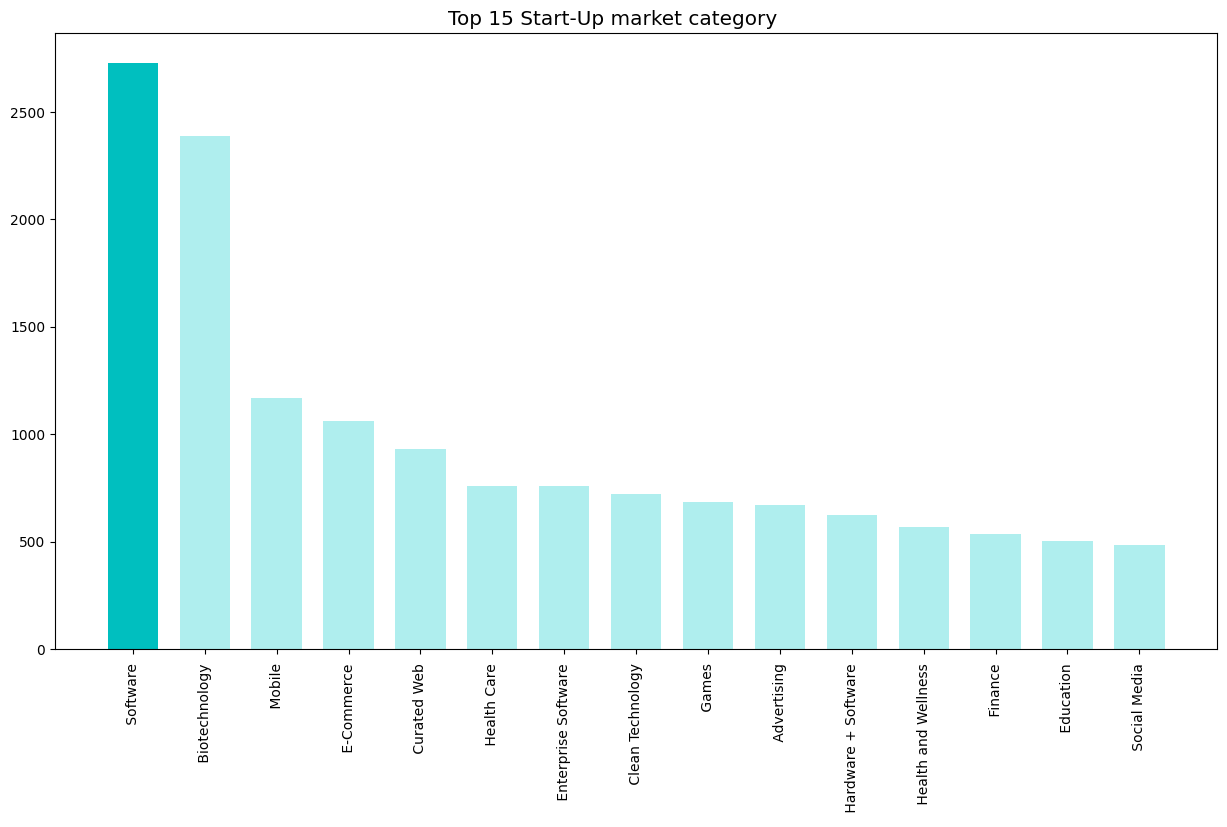

In [ ]:
plt.rcParams['figure.figsize'] = 15,8

height = data['market'].value_counts()[:15].tolist()
bars =  data['market'].value_counts()[:15].index.tolist()
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7 ,color= ['c']+['paleturquoise']*14)
plt.xticks(y_pos, bars)
plt.xticks(rotation=90)
plt.title("Top 15 Start-Up market category", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

# Category

In [ ]:
data.category_list

0               |Entertainment|Politics|Social Media|News|
1                                                  |Games|
2                                   |Publishing|Education|
3        |Electronics|Guides|Coffee|Restaurants|Music|i...
4                            |Tourism|Entertainment|Games|
                               ...                        
29409        |Mobile|Hardware|Fashion|Hardware + Software|
29410                                             |Travel|
29411    |Enterprise 2.0|Business Services|Enterprise S...
29412                      |Web Tools|Incubators|Software|
29413                                        |Curated Web|
Name: category_list, Length: 29413, dtype: object

In [ ]:
set_keywords = set()
for liste_keywords in data['category_list'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')

The most popular category is still about Software & Mobile,
It maybe because these 2 categories are easily to scalable ?

# Total Funding USD

In [ ]:
data['funding_total_usd'].head()

0     17,50,000 
1     40,00,000 
2        40,000 
3     15,00,000 
4        60,000 
Name: funding_total_usd, dtype: object

Unlucky..., this column is provided in "string" format which contain comma(,) minus(-) and space ( )
we need to replace them and convert it to numeric format first

In [ ]:
data['funding_total_usd'] = data['funding_total_usd'].str.replace(',', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace('-', '')
data['funding_total_usd'] = data['funding_total_usd'].str.replace(' ', '')

data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')

In [ ]:
data['funding_total_usd'].head()

0    1750000.0
1    4000000.0
2      40000.0
3    1500000.0
4      60000.0
Name: funding_total_usd, dtype: float64


Okay..., let do some visualize

Seem like it has large gap between the highest value and the lowest,
let ignore outlier first   : )
I will use the simple remove outlier technique such as 1.5IQR

In [ ]:
Q1 = data['funding_total_usd'].quantile(0.25)
Q3 = data['funding_total_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)



In [ ]:
without_outlier = data[(data['funding_total_usd'] > lower_bound ) & (data['funding_total_usd'] < upper_bound)]

In [ ]:
Facebook_total_funding = data['funding_total_usd'][data['name']=="Facebook"].values[0]

Alibaba_total_funding = data['funding_total_usd'][data['name']=="Alibaba"].values[0]
Cloudera_total_funding = data['funding_total_usd'][data['name']=="Cloudera"].values[0]

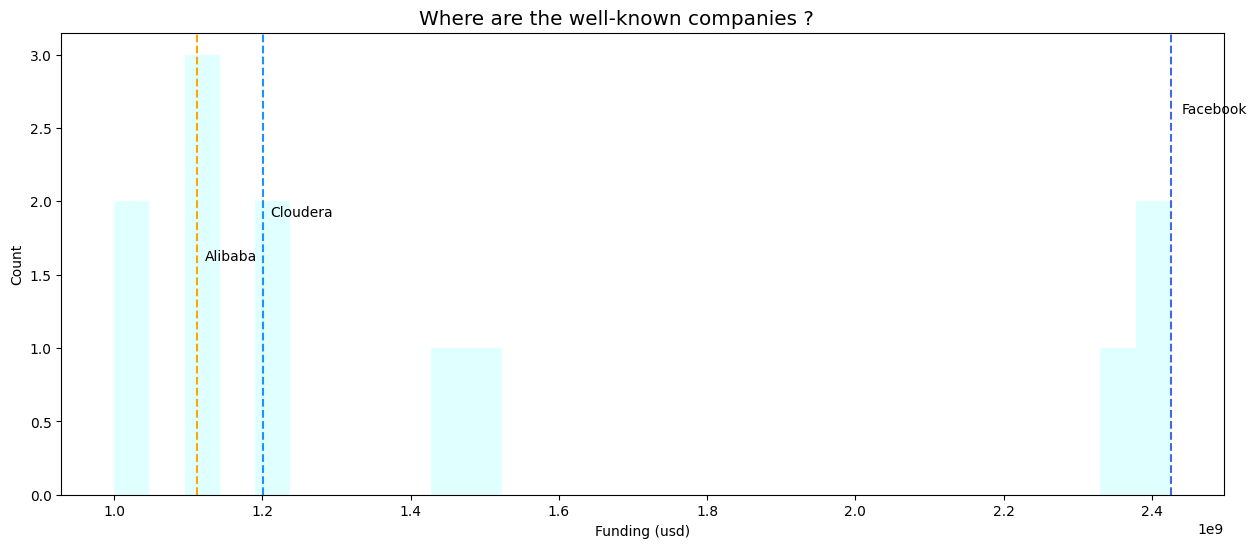

In [ ]:
plt.rcParams['figure.figsize'] = 15,6

plt.hist(data['funding_total_usd'][(data['funding_total_usd'] >= 1000000000)&(data['funding_total_usd'] <= 3000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Where are the well-known companies ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 2.6,"Facebook")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 1.9,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 1.6,"Alibaba")




plt.show()

But..., Are they the highest funding ?
the answer is no.

In [ ]:
Verizon_total_funding = data['funding_total_usd'][data['name']=="Ver
Sberbank_total_funding = data['funding_total_usd'][data['name']=="Sberbank"].values[0]

IndexError: ignored

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(data['funding_total_usd'][(data['funding_total_usd'] >= 1000000000)].dropna(), bins=30,color = 'lightcyan' )
plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Who get the highest funding ? ", fontdict=None, position= [0.48,1.05], size = 'x-large')

plt.axvline(Facebook_total_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_total_funding+15000000, 11,"Facebook")

plt.axvline(Uber_total_funding,color='black',linestyle ="--")
plt.text(Uber_total_funding+10000000, 9,"Uber")

plt.axvline(Cloudera_total_funding,color='dodgerblue',linestyle ="--")
plt.text(Cloudera_total_funding+10000000, 7,"Cloudera")

plt.axvline(Alibaba_total_funding,color='orange',linestyle ="--")
plt.text(Alibaba_total_funding+10000000, 4,"Alibaba")

plt.axvline(Verizon_total_funding,color='red',linestyle ="--")
plt.text(Verizon_total_funding+100000000, 15,"Verizon Communications")

plt.axvline(Sberbank_total_funding,color='mediumseagreen',linestyle ="--")
plt.text(Sberbank_total_funding+100000000, 12,"Sberbank")


plt.show()

The most funding company in this dataset is "Verizon communication" which has total fund around 30,000,000,000 usd

In [ ]:
data['founded_at'].head()

This column is provided in term of string format which we need to convert to datetime first

In [ ]:
data['founded_at'] = pd.to_datetime(data['founded_at'], errors = 'coerce' )

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
data['name'].groupby(data["founded_at"].dt.year).count().plot(kind="line")

plt.ylabel('Count')
plt.title("Founded distribution ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [ ]:
Facebook_founded_year = data['founded_at'][data['name']=="Facebook"].dt.year.values[0]
Uber_founded_year  = data['founded_at'][data['name']=="Uber"].dt.year.values[0]
Alibaba_founded_year  = data['founded_at'][data['name']=="Alibaba"].dt.year.values[0]

In [ ]:
Uber_founded_year

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
data['name'][data["founded_at"].dt.year >= 1990].groupby(data["founded_at"].dt.year).count().plot(kind="line")
plt.ylabel('Count')

plt.axvline(Facebook_founded_year,color='royalblue',linestyle ="--")
plt.text(Facebook_founded_year+0.15, 3000,"Facebook \n (2004)")

plt.axvline(Uber_founded_year,color='black',linestyle ="--")
plt.text(Uber_founded_year+0.15, 4000,"Uber \n(2009)")

plt.axvline(Alibaba_founded_year,color='orange',linestyle ="--")
plt.text(Alibaba_founded_year+0.15, 2000,"Alibaba \n(1999)")


plt.title("When the well-known company found ?", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

# Country Code

In [ ]:
len(data['country_code'].unique())

In [ ]:
data['country_code'].value_counts()[:20]

USA    17195
GBR     1526
CAN      831
CHN      774
DEU      590
IND      532
FRA      525
ISR      408
ESP      328
RUS      219
SGP      198
BRA      187
ITA      182
CHL      181
IRL      179
SWE      175
JPN      175
AUS      171
NLD      171
KOR      148
Name: country_code, dtype: int64

In [ ]:
data['count'] = 1
country_market = data[['count','country_code','market']].groupby(['country_code','market']).agg({'count': 'sum'})
# Change: groupby state_office and divide by sum
country_market_pct = country_market.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
country_market_pct.reset_index(inplace = True)

In [ ]:
USA_market_pct = country_market_pct[country_market_pct['country_code'] == "USA"]
USA_market_pct = USA_market_pct.sort_values('count',ascending = False)[0:10]

In [ ]:
IND_market_pct = country_market_pct[country_market_pct['country_code'] == "IND"]
IND_market_pct['count'].sum()

100.0

In [ ]:
USA_market_pct['count'].sum()

45.96694009445687

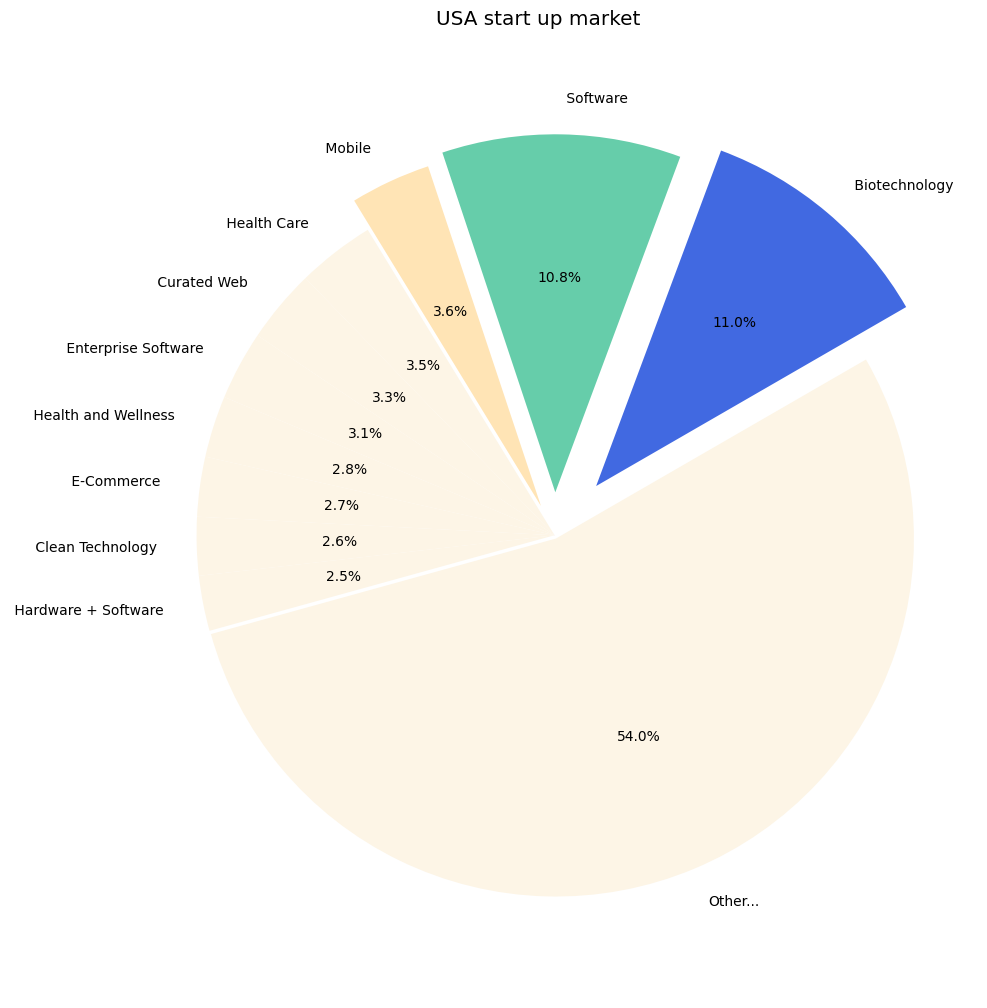

In [ ]:
## USA
plt.rcParams['figure.figsize'] =10,10
labels = list(USA_market_pct['market'])+['Other...']
sizes = list(USA_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','mediumaquamarine','moccasin'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("USA start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()

For USA, Most of start up market is about Software & Technology

In [ ]:
IND_market_pct = country_market_pct[country_market_pct['country_code'] == "IND"]
IND_market_pct = IND_market_pct.sort_values('count',ascending = False)[0:10]

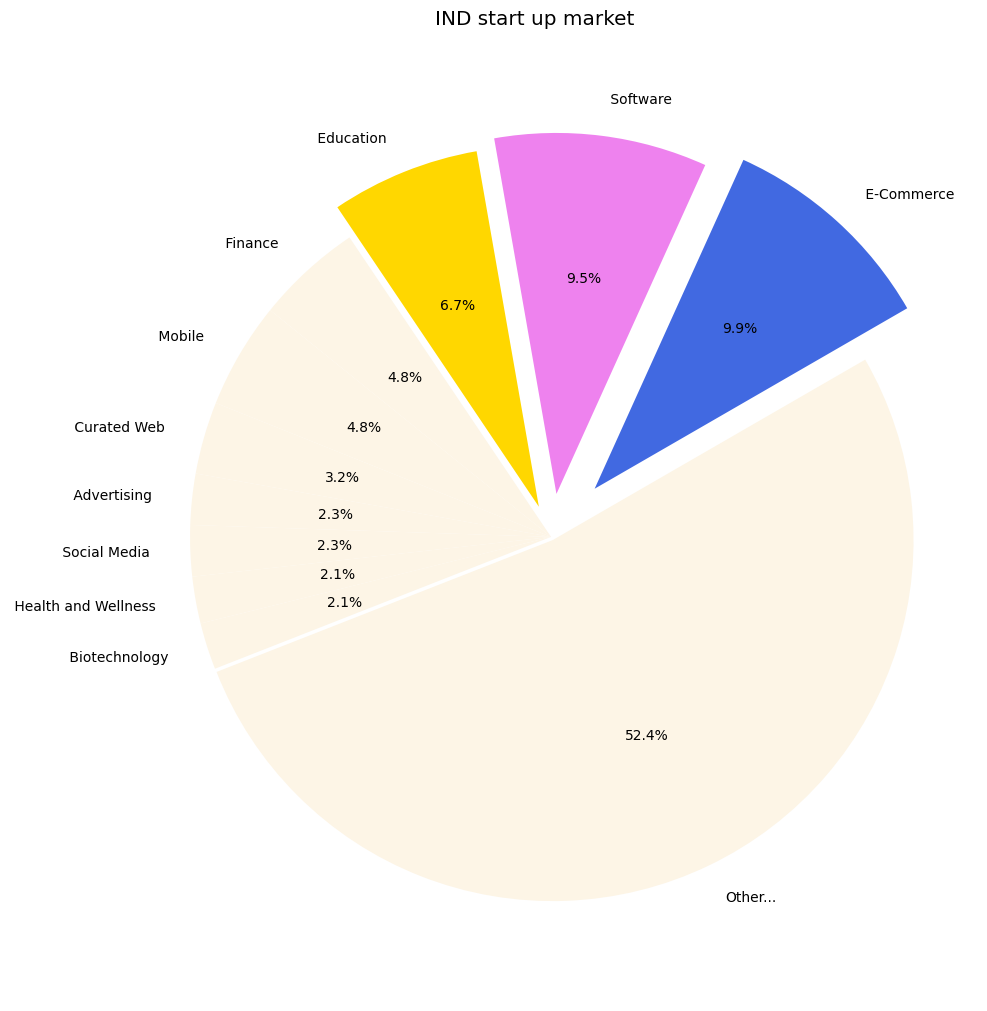

In [ ]:
plt.rcParams['figure.figsize'] = 10,10
labels = list(IND_market_pct['market'])+['Other...']
sizes = list(IND_market_pct['count'])+[100-USA_market_pct['count'].sum()]
explode = (0.18, 0.12, 0.09,0,0,0,0,0,0,0,0.01)
colors =  ['royalblue','violet','gold'] +['oldlace']*8

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',shadow=False, startangle=30)
plt.axis('equal')
plt.tight_layout()
plt.title("IND start up market", fontdict=None, position= [0.48,1.1], size = 'x-large')
plt.show()

# Funding Analysis

In [ ]:
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format
## Function for providing summary in dataframe
%matplotlib inline

def funding_information(data,name):
    company = data[data['name'] == name]
    print ("Company : ", name)
    print ("Total Funding : ", company.funding_total_usd.values[0] , " $")
    print ("Seed Funding : ", company.seed.values[0] , " $")
    print ("Angle Funding :", company.angel.values[0] , " $")
    print ("Grant Funding : ",company.grant.values[0] , " $")
    print ("Product Crowd Funding : ",company.product_crowdfunding.values[0] , " $")
    print ("Equity Crowd Funding : ",company.equity_crowdfunding.values[0] , " $")
    print ("Undisclode Funding : ", company.undisclosed.values[0] , " $")
    print ("Convertible Note : ", company.convertible_note.values[0] , " $")
    print ("Debt Financing : ", company.debt_financing.values[0] , " $")
    print ("Private Equity : ",company.private_equity.values[0] , " $")
    print ("PostIPO Equity : ",company.post_ipo_equity.values[0] , " $")
    print ("PostIPO Debt : ",company.post_ipo_debt.values[0] , " $")
    print ("Secondary Market : ",company.secondary_market.values[0] , " $")
    print ("Venture Funding : ",company.venture.values[0] , " $")
    print ("Round A funding : ",company.round_A.values[0] , " $")
    print ("Round B funding : ",company.round_B.values[0] , " $")
    print ("Round C funding : ",company.round_C.values[0] , " $")
    print ("Round D funding : ",company.round_D.values[0] , " $")
    print ("Round E funding : ",company.round_E.values[0] , " $")
    print ("Round F funding : ",company.round_F.values[0] , " $")
    print ("Round G funding : ",company.round_G.values[0] , " $")
    print ("Round H funding : ",company.round_H.values[0] , " $")

def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in [s for s in liste_keywords if s in liste]:
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=750,
                      background_color=color,
                      max_words=50,
                      max_font_size=500,
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [ ]:
funding_information(data,"Dropbox")

Here I have the print function to make data easier to consume,
As you can see in "Dropbox" case,
The total funding is 1,107,215,000 usd

which came from Seed Funding 15,000 usd
            and Debt Financing 5,000,000 usd
            and Venture Funding 6,0720,000 usd

For Venture Funding, this dataset also shows How much company get fund in each round.

In [ ]:
funding_information(data,"Uber")

For the "Uber" case,
The total funding is 1,507,450,000 usd

which came from Seed Funding 200,000 usd
            and Angle Funding 1,250,000 usd
            and Venture Funding 1,506,000,000 usd

Seed funding is the first official equity funding stage.
It typically represents the first official money that a business venture or enterprise raises;
some companies never extend beyond seed funding into Series A rounds or beyond.

In [ ]:
data[['name','seed']].head(5)

Average funding in this stage ?

 Note you need to beware when use the mean value
 Most of value in this column is 0, they will drag your average value down
 The solution is using data which is not 0 to find average


In [ ]:
print("The average of seed funding stage is around ",data['seed'][data['seed'] != 0].mean(), "$")

But... How many company get funding in seed stage ?

In [ ]:
data['get_funding_in_seed'] = data['seed'].map(lambda s :1  if s > 0 else 0)

In [ ]:
## USA
plt.rcParams['figure.figsize'] =10,10
labels = ['No','Get funding']
sizes = data['get_funding_in_seed'].value_counts().tolist()
explode = (0, 0.1)
colors =  ['lightcoral','palegreen']

plt.pie(sizes, explode = explode, colors = colors ,labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=190)
plt.axis('equal')
plt.tight_layout()
plt.title("How may company get funding in seed stage", fontdict=None, position= [0.48,1.1], size = 'x-large')

plt.show()


In [ ]:
## Remove Outlier first
Q1 = data['seed'][data['seed'] != 0].quantile(0.25)
Q3 = data['seed'][data['seed'] != 0].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
without_outlier = data[(data['seed'] > lower_bound ) & (data['seed'] < upper_bound)]

In [ ]:
Facebook_seed_funding = data['seed'][data['name']=="Facebook"].values[0]
Uber_seed_funding   = data['seed'][data['name']=="Uber"].values[0]
Dropbox_seed_funding   = data['seed'][data['name']=="Dropbox"].values[0]

In [ ]:
plt.rcParams['figure.figsize'] = 15,6
plt.hist(without_outlier['seed'][without_outlier['seed']!=0].dropna(), bins=50,color = 'cornsilk' )

plt.axvline(Facebook_seed_funding,color='royalblue',linestyle ="--")
plt.text(Facebook_seed_funding+0.15, 200,"Facebook \n ( 0$ )")

plt.axvline(Uber_seed_funding,color='black',linestyle ="--")
plt.text(Uber_seed_funding+0.15, 2000,"      Uber \n ( 200000$ )")

plt.axvline(Dropbox_seed_funding,color='violet',linestyle ="--")
plt.text(Dropbox_seed_funding+0.15, 1000,"  Dropbox \n( 15000$ )")

plt.ylabel('Count')
plt.xlabel('Funding (usd)')
plt.title("Distribution of Seed funding ", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

# Angel funding

Who is angel?

An angel investor (also known as a private investor, seed investor or angel funder)
is a high net worth individual who provides financial backing for small startups or entrepreneurs,
typically in exchange for ownership equity in the company. Often, angel investors are found among
an entrepreneur's family and friends.
The funds that angel investors provide may be a one-time investment to help the business get off the ground
or an ongoing injection to support and carry the company through its difficult early stages.


In [ ]:
print("The average of Angel funding is around ",data['angel'][data['angel'] != 0].mean(), "$")

In [ ]:
data['get_funding_in_angel'] = data['angel'].map(lambda s :"Get funding"  if s > 0 else "Not get funding")

In [ ]:
print("Only " , data['get_funding_in_angel'].value_counts().values[1], " companies has angel investor")
print("while " , data['get_funding_in_angel'].value_counts().values[0], " are not")
print("~",data['get_funding_in_angel'].value_counts().values[1]/(data['get_funding_in_angel'].value_counts().values[1]+data['get_funding_in_angel'].value_counts().values[0]) *100, "percent")

Only  3129  companies has angel investor
while  46308  are not
~ 6.329267552642757 percent

Investment in each round

In [ ]:
data['round_A'][data['round_A'] != 0].mean()

In [ ]:
data['round_B'][data['round_B'] != 0].mean()

In [ ]:
data['round_C'][data['round_C'] != 0].mean()

Those number above is average funding of each round of investment,
you can see that the farther round the investment is higher too.

In [ ]:
round_ = ['round_A','round_B','round_C','round_D','round_E','round_F','round_G','round_H']
amount = [data['round_A'][data['round_A'] != 0].mean(),
          data['round_B'][data['round_B'] != 0].mean(),
          data['round_C'][data['round_C'] != 0].mean(),
          data['round_D'][data['round_D'] != 0].mean(),
          data['round_E'][data['round_E'] != 0].mean(),
          data['round_F'][data['round_F'] != 0].mean(),
          data['round_G'][data['round_G'] != 0].mean(),
         data['round_H'][data['round_H'] != 0].mean()]


In [ ]:
plt.rcParams['figure.figsize'] = 15,8

height = amount
bars =  round_
y_pos = np.arange(len(bars))
plt.bar(y_pos, height , width=0.7, color= ['cornsilk','oldlace','papayawhip','wheat','moccasin','navajowhite','burlywood','goldenrod'] )
plt.xticks(y_pos, bars)
plt.title("Average investment in each round", fontdict=None, position= [0.48,1.05], size = 'x-large')
plt.show()

In [ ]:
# unique value in City
print("Number of Unique Values: ", (data['market'].nunique()))
print("Number of Missing Values: ", data['market'].isna().sum())
# Value Counts of top 10 cities
print((data['market'].value_counts()[0:10]))

In [ ]:
data

In [ ]:
#Plot of training_hours
print("Number of Missing Values: ", data['funding_total_usd'].isna().sum())
plt.figure(figsize=(14,6))
sns.distplot(data.funding_total_usd).set_title("Distributional of market");

# Feature Selection

**Correlation in Data**

In [ ]:
data.corr()

In [ ]:
data.head()

**Splitting the data**

In [ ]:
# Non_numerical_data
data.homepage_url
data.category_list
data.market
data.status
data.name
data.country_code
data.state_code
data.region
data.city
data.founded_at

In [ ]:
# Numerical Data
data.funding_total_usd
data.funding_rounds
data.first_funding_at
data.last_funding_at
data.seed
data.venture
data.equity_crowdfunding
data.undisclosed
data.convertible_note
data.debt_financing
data.angel
data.grant
data.private_equity
data.post_ipo_debt
data.secondary_market
data.product_crowdfunding
data.round_A
data.round_B
data.round_C
data.round_D
data.round_E
data.round_F
data.round_G
data.round_H
data.grant

In [ ]:
# 'funding_total_usd',
# 'name','homepage_url','category_list','market','status', 'country_code', 'state_code' ,'region','city''founded_at' ,'founded_month' ,'founded_quarter','founded_year' , ,'first_funding_at' ,'last_funding_at'

data.grant

In [ ]:
X=data[['funding_rounds', 'seed' ,'venture','equity_crowdfunding','undisclosed' ,'convertible_note' ,'debt_financing','angel', 'private_equity' ,'post_ipo_equity', 'post_ipo_debt','secondary_market', 'product_crowdfunding', 'round_A' ,'round_B', 'round_C','round_D', 'round_E' ,'round_F' ,'round_G', 'round_H']]
y=data['grant']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.fillna(0)
X.fillna(0)
X_train.isnull().sum()

# Applying Models

#### Determine the baseline model accuracy

In [ ]:
# create baseline model
def baseline_model(n_predictions, value_to_predict):
    """
    just predict a single value (e.g. mean) for everything
    """
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

In [ ]:
n_predictions = len(y_test)  # how many predictions to make? '3832'
baseline_value =pd.Series(y_train).value_counts().index[0]  # what value to predict? (classification = most common class '0.0')
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds

In [ ]:
baseline_acc=accuracy_score(y_test, baseline_preds) #Accuracy score of baseline model
print('The baseline model accuracy score is :',baseline_acc)

#### RandomForestClassifier Model

In [ ]:
# create and fit RandomForestClassifier model
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
# predict
pred = rfc.predict(X_test)
# pred
rfc_acc= accuracy_score(y_test, pred)
print('The accuracy score using the RandomForestClassifier (befor resample) is :',rfc_acc)
print(classification_report(y_test, pred))

#### DecisionTreeClassifier Model

In [ ]:
# create and fit DecisionTreeClassifier model
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
#predict
pred = dtc.predict(X_test)
# pred

dtc_acc= accuracy_score(y_test, pred)
print('The accuracy score with using the decision tree classifier is :',dtc_acc)

print(classification_report(y_test, pred))

#### KNeighborsClassifier Model

In [ ]:
# create and fit KNeighborsClassifier model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

#predict
pred = knn.predict(X_test)

# #KNN accuracy score
Knn_acc= accuracy_score(y_test, knn.predict(X_test))
print('The accuracy socre using the KNeighborsClassifier is :',Knn_acc)

print(classification_report(y_test, pred))

## Evaluation

**Comparing Model Accuracy**

In [ ]:
pd.DataFrame([baseline_acc, rfc_acc, dtc_acc, Knn_acc]).plot.bar();
plt.xticks(np.arange(4),('Baseline','RFC','DTC','KNN'))
plt.legend().remove()
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation = 0)
plt.title('Comparing Model Accuracy');

# Conclusion / Final Thoughts

We have applied three distinctive machine learning techniques to the data. Decision tree seem to be the most successful out of them. Decision tree accomplished 0.984 accuracy score.which it is perfect and we think we can consider it a successful classification. while baseline accuracy score is 0.976, KNN accuracy score is 0.984, Random Forest accuracy score is 0.985.
